In [288]:
import numpy as np
import pandas as pd
import pathlib as p
import seaborn as sb
import matplotlib.pyplot as plt
import pathlib
from pathlib import Path
from datetime import datetime

In [289]:
%matplotlib inline

In [290]:
def extractParentDir(dataFileName):
    purePath = pathlib.PurePath(dataFileName)
    parentDir2 = purePath.parent.parent
    return parentDir2

In [291]:
todayVal = datetime.today()
timeStampStr = todayVal.strftime("%y-%m-%d_%H-%M-%S.%f")
data_dir = r"C:\work\dev\dECMT_src\data_all\COVID19_Data\Current"
parentDir2 = extractParentDir(data_dir)
outputPath = Path(parentDir2) / "Output_Covid19_Analysis"/f"{timeStampStr}_bipartite"

In [292]:
comorbidFN = p.Path(data_dir) / "REACT_Comorbidities_unpivoted.csv"
demogFN = p.Path(data_dir) / "REACT_Demographics.csv"

In [293]:
comorbidDF:pd.DataFrame = pd.read_csv(comorbidFN)
demogDF:pd.DataFrame = pd.read_csv(demogFN)


In [294]:
# comorbidDF.head()

In [295]:
# demogDF.head()

In [296]:
comorbidDF.columns

Index(['STUDY_ID', 'COMORBIDITY', 'STATUS'], dtype='object')

In [297]:
# comorbidDF['COMORBIDITY'].unique()


In [298]:
dfRes:pd.DataFrame = pd.merge(demogDF, comorbidDF, on='STUDY_ID', how='inner')

In [299]:
dfRes['RENAL_D_PRESENT'] = (dfRes['COMORBIDITY'] == 'RENAL_D')

In [300]:
dfRes.head()

,STUDY_ID,PATIENT_AGE,DOB,DATE_OF_DEATH,DOD_DATE,GENDER,ETHNIC_GROUP,SMOKING_HISTORY,POSTCODE,IS_PREGNANT,...,DISCHARGE_TIME_R,LOS,LOS_PREPOS,READM28,READM_DATETIME,READM_DATE,READM_TIME,COMORBIDITY,STATUS,RENAL_D_PRESENT
0,UHSCOVID_00989a42,64.0,01/1956,NaN,NaN,2,A,NR|NR,SO19,0,...,10:21:00,6.71,-0.1,N,NaN,NaN,NaN,COPD,1,False
1,UHSCOVID_00989a42,64.0,01/1956,NaN,NaN,2,A,NR|NR,SO19,0,...,10:21:00,6.71,-0.1,N,NaN,NaN,NaN,ASTHMA,1,False
2,UHSCOVID_00989a42,64.0,01/1956,NaN,NaN,2,A,NR|NR,SO19,0,...,10:21:00,6.71,-0.1,N,NaN,NaN,NaN,DIABETES,1,False
3,UHSCOVID_00989a42,64.0,01/1956,NaN,NaN,2,A,NR|NR,SO19,0,...,10:21:00,6.71,-0.1,N,NaN,NaN,NaN,OBESITY,1,False
4,UHSCOVID_00ac1e32,73.0,10/1946,NaN,NaN,2,A,Ex-smoker|NR,SO21,0,...,12:56:00,41.79,4.0,N,NaN,NaN,NaN,HYPERTENSION,1,False


In [301]:
dfRes.columns

Index(['STUDY_ID', 'PATIENT_AGE', 'DOB', 'DATE_OF_DEATH', 'DOD_DATE', 'GENDER',
       'ETHNIC_GROUP', 'SMOKING_HISTORY', 'POSTCODE', 'IS_PREGNANT', 'HEIG',
       'WEIG', 'BMI', 'FIRST_POS_DATE', 'FIRST_POS_DATE_R', 'FIRST_POS_TIME_R',
       'ADMIT_DATETIME', 'ADM_DATE_R', 'ADM_TIME_R', 'DISCHARGEDATE',
       'DISCHARGE_DATE_R', 'DISCHARGE_TIME_R', 'LOS', 'LOS_PREPOS', 'READM28',
       'READM_DATETIME', 'READM_DATE', 'READM_TIME', 'COMORBIDITY', 'STATUS',
       'RENAL_D_PRESENT'],
      dtype='object')

In [302]:
def getHeatmapFreq(df,colName,discretize=False,fontScale=1):
    comordCol = colName
    label_freq = dfRes.groupby([comordCol,'RENAL_D_PRESENT']).size().reset_index(name='COUNTS')
    label_freq['Fraction'] = label_freq['COUNTS']/ label_freq['COUNTS'].sum()
    label_freq.set_index('RENAL_D_PRESENT',inplace=True)
    hmFractionDF = label_freq.pivot(columns=colName, values='Fraction')
    # hmCountsDF = label_freq.pivot(columns=colName, values='Fraction')
    fig = plt.figure(num=None, figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
    sb.set(font_scale=fontScale)
    figFrac = sb.heatmap(hmFractionDF, annot=True,fmt='.2%', annot_kws={"fontsize":"small"})
    plt.title('Fractions of Categories')
    #  ****************************
    #     fig = plt.figure()
    ax = plt.gca()
    return (figFrac,ax)

# fix,ax = getHeatmapFreq(dfRes,'ETHNIC_GROUP',fontScale=1)
# fix,ax = getHeatmapFreq(dfRes,'GENDER',fontScale=2)

In [303]:
def getHeatmapCount(df,colName,discretize=False,fontScale=1):
    comordCol = colName
    label_freq = dfRes.groupby([colName,'RENAL_D_PRESENT']).size().reset_index(name='COUNTS')
    label_freq.set_index('RENAL_D_PRESENT',inplace=True)
    hmCountsDF = label_freq.pivot(columns=colName, values='COUNTS')
    fig = plt.figure(num=None, figsize=(15, 10), dpi=100, facecolor='w', edgecolor='k')
    figCounts = sb.heatmap(hmCountsDF, annot=True,fmt='.0f')
    sb.set(font_scale=fontScale)
    plt.title('Counts of Categories')
    #  ****************************
    #     fig = plt.figure()
    ax = plt.gca()
    return (figCounts,ax)

#
# selCol = 'SMOKING_HISTORY'
# selCols = ['RENAL_D_PRESENT',selCol]
# getHeatmapCount(dfRes, selCol,fontScale=2)
# getHeatmapCount(dfRes,'ETHNIC_GROUP',fontScale=0.7)

In [304]:
def countsStackedBar(df,cols):
    x = df.groupby(cols).size().unstack()
    fig = plt.figure(figsize=(15, 10), dpi=100)
    x.plot(kind='bar',stacked=True)
    plt.title('Counts of Categories' )
    plt.savefig('')
    plt.show()

# countsStackedBar(dfRes,['RENAL_D_PRESENT','GENDER'])
# countsStackedBar(dfRes,['RENAL_D_PRESENT','ETHNIC_GROUP'])

In [305]:
def freqStackedBar(df,colName):
    label_freq = df.groupby([colName,'RENAL_D_PRESENT']).size().reset_index(name='COUNTS')
    label_freq['Fraction'] = label_freq['COUNTS']/ label_freq['COUNTS'].sum()
    label_freq.set_index('RENAL_D_PRESENT',inplace=True)
    hmFractionDF = label_freq.pivot(columns=colName, values='Fraction')
    # hmCountsDF = label_freq.pivot(columns=colName, values='Fraction')
    # **************
    fig = plt.figure(figsize=(15, 10), dpi=100)
    x = hmFractionDF.plot(kind='bar',stacked=True)
    plt.title('Fractions of categories')
    # label_freq.plot(kind='bar',stacked=True)
    plt.savefig('')


# freqStackedBar(dfRes,'GENDER')
# freqStackedBar(dfRes,'ETHNIC_GROUP')

# Gender and Renal

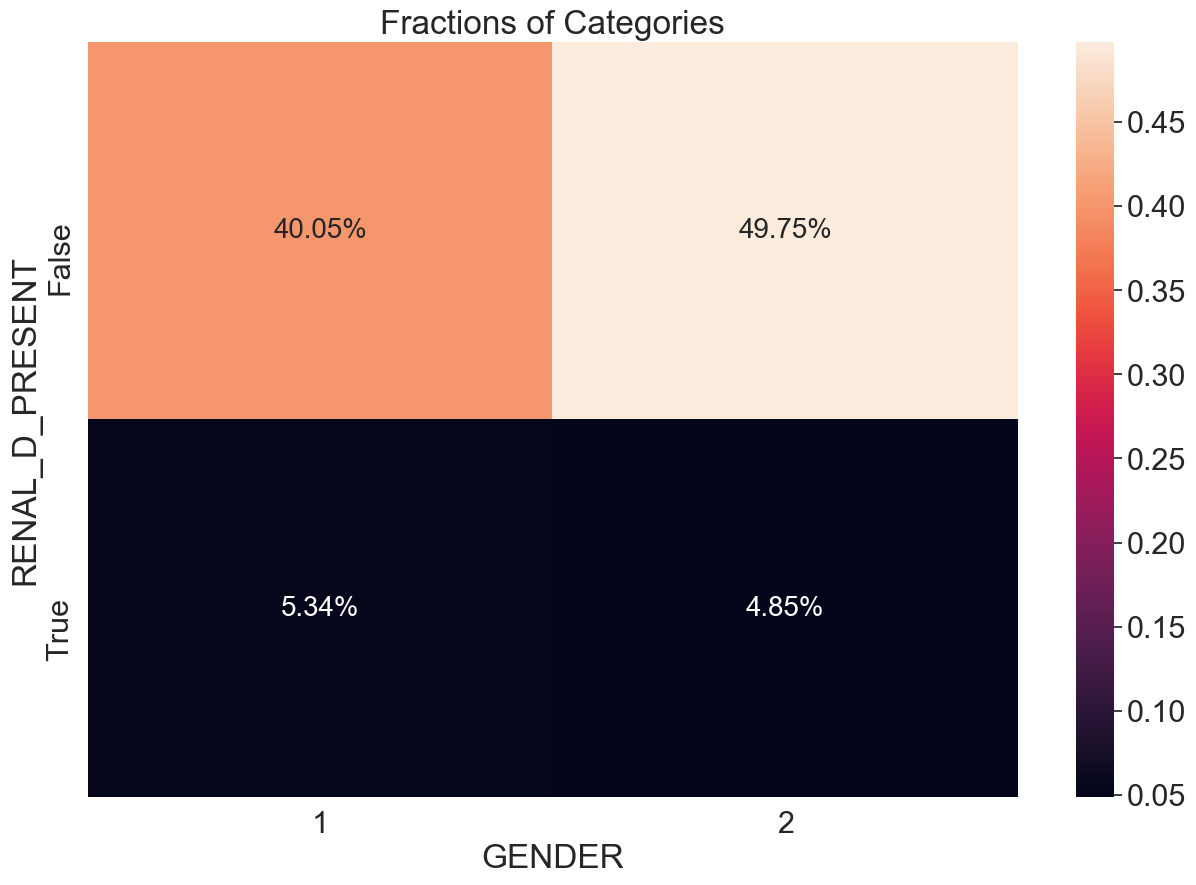

In [306]:
fix,ax = getHeatmapFreq(dfRes,'GENDER',fontScale=2)

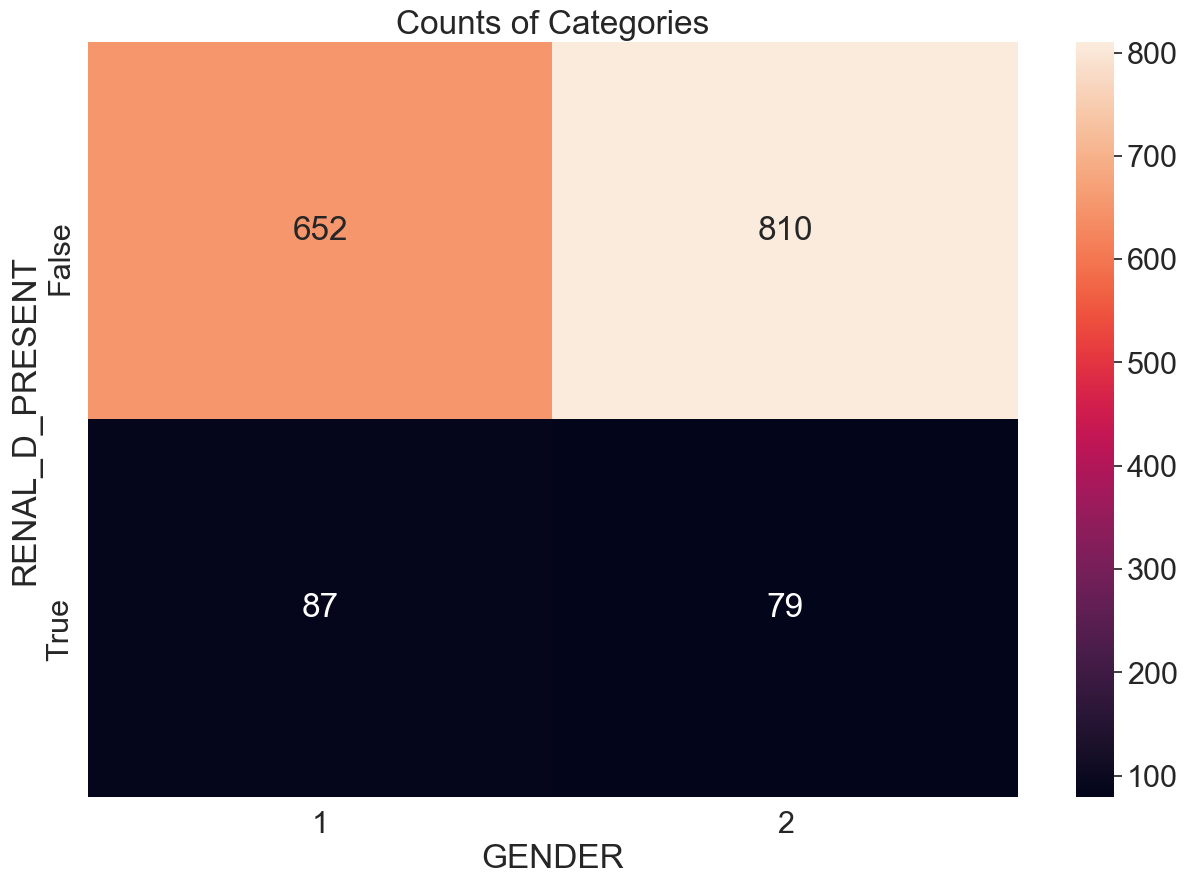

In [307]:
fix,ax = getHeatmapCount(dfRes,'GENDER',fontScale=2)


<Figure size 1500x1000 with 0 Axes>

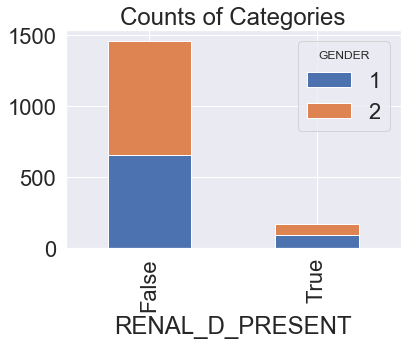

In [308]:
countsStackedBar(dfRes,['RENAL_D_PRESENT','GENDER'])

<Figure size 1500x1000 with 0 Axes>

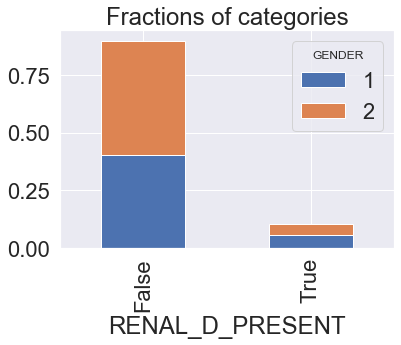

In [309]:
x = freqStackedBar(dfRes,'GENDER')

# Ethnic Group vs Renal

(<matplotlib.axes._subplots.AxesSubplot at 0x1a619672c08>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a619672c08>)

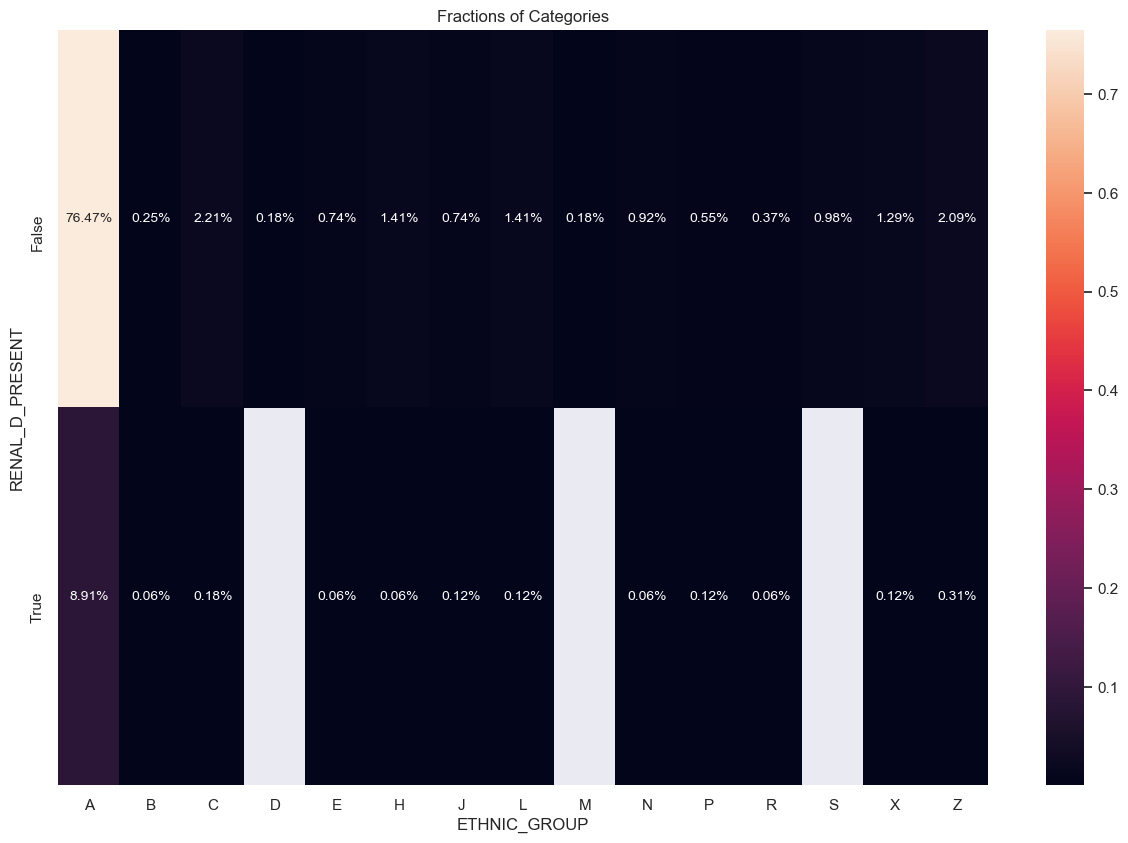

In [310]:
getHeatmapFreq(dfRes,'ETHNIC_GROUP',fontScale=1)

(<matplotlib.axes._subplots.AxesSubplot at 0x1a61e686608>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a61e686608>)

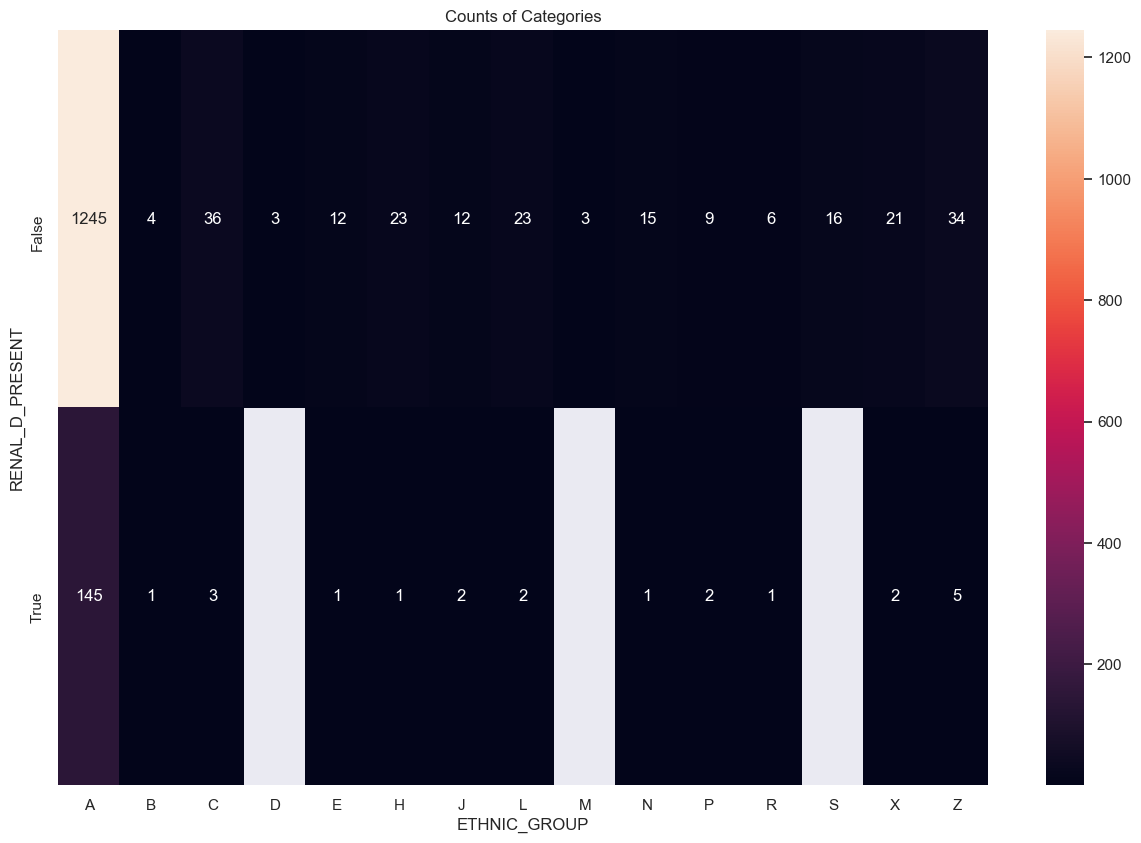

In [311]:
getHeatmapCount(dfRes,'ETHNIC_GROUP',fontScale=1)

<Figure size 1500x1000 with 0 Axes>

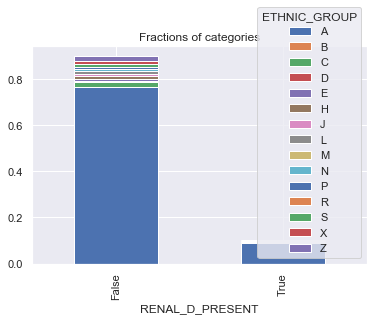

In [312]:
freqStackedBar(dfRes,'ETHNIC_GROUP')

<Figure size 1500x1000 with 0 Axes>

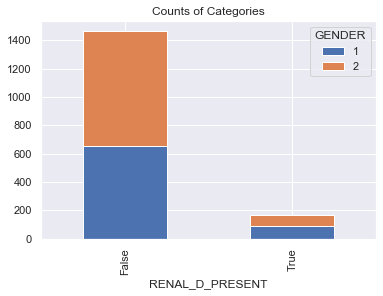

In [313]:
countsStackedBar(dfRes,['RENAL_D_PRESENT','GENDER'])

# Smoking History vs Renal Disease

(<matplotlib.axes._subplots.AxesSubplot at 0x1a61eaaa248>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a61eaaa248>)

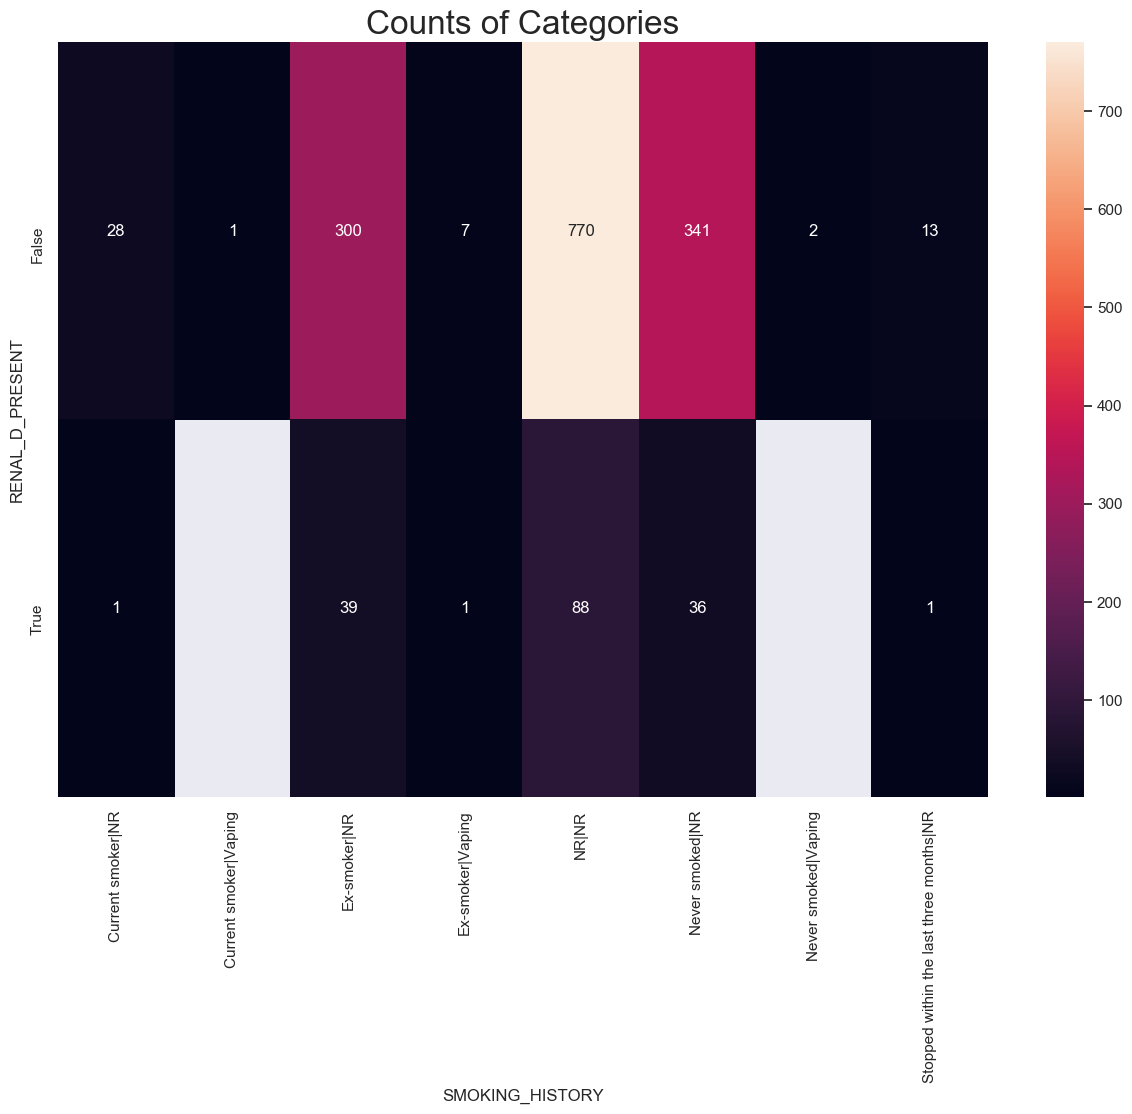

In [314]:
selCol = 'SMOKING_HISTORY'
selCols = ['RENAL_D_PRESENT',selCol]
getHeatmapCount(dfRes, selCol,fontScale=2)


(<matplotlib.axes._subplots.AxesSubplot at 0x1a61e8f8d08>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a61e8f8d08>)

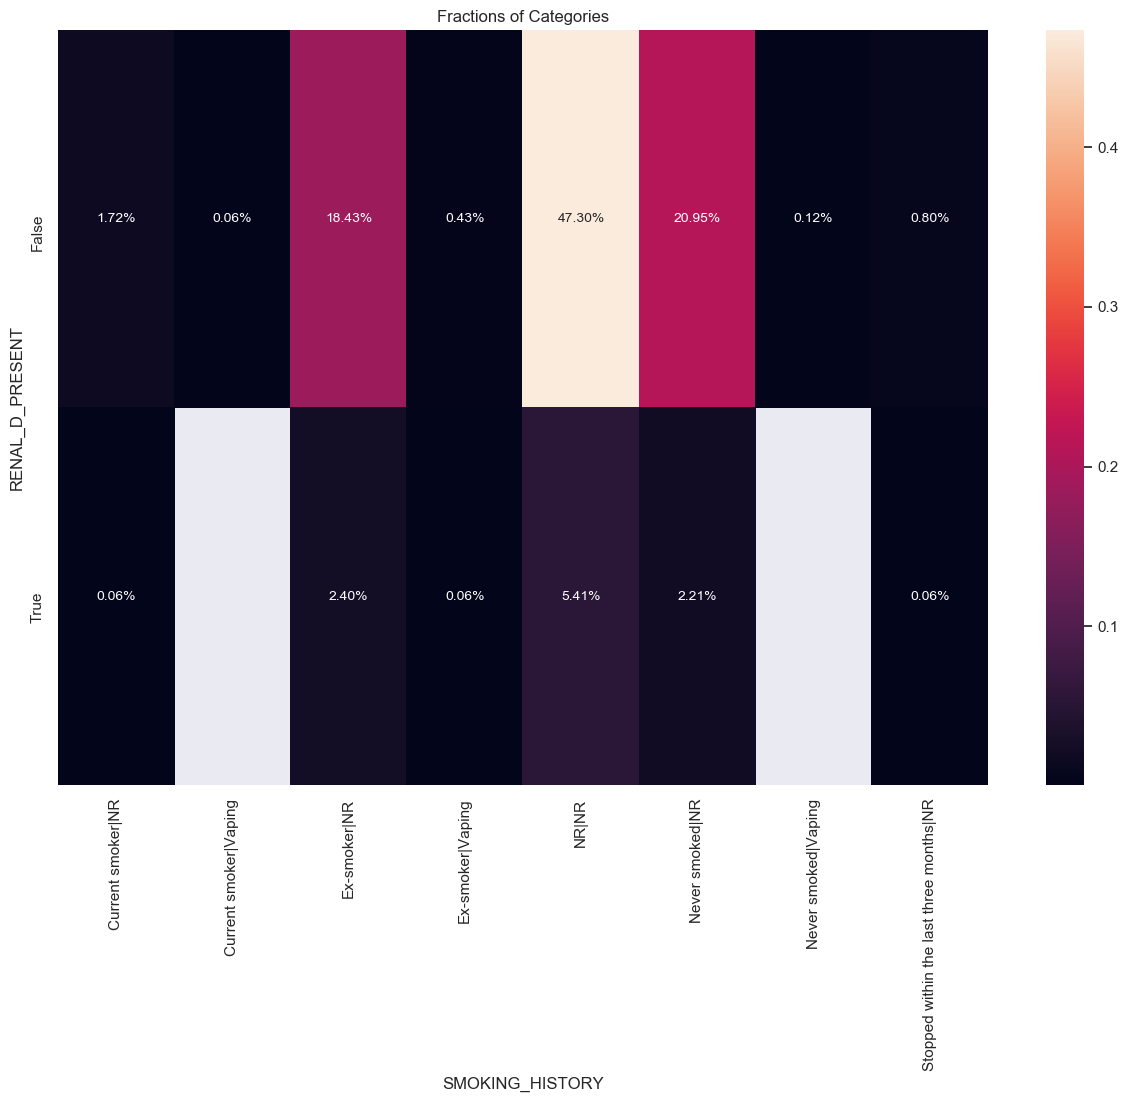

In [315]:
getHeatmapFreq(dfRes, selCol,fontScale=1)



<Figure size 1500x1000 with 0 Axes>

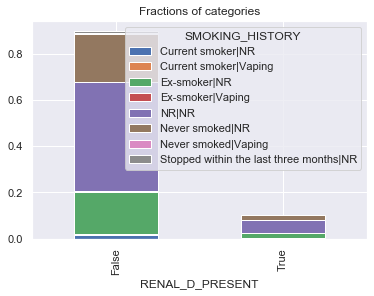

<Figure size 1500x1000 with 0 Axes>

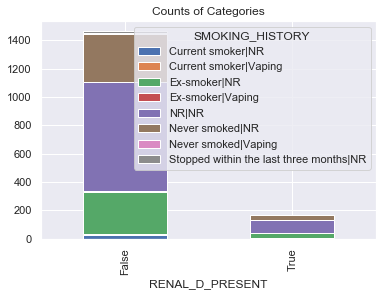

In [316]:
freqStackedBar(dfRes, selCol)
countsStackedBar(dfRes, selCols)


In [317]:
dfRes[selCols]



,RENAL_D_PRESENT,SMOKING_HISTORY
0,False,NR|NR
1,False,NR|NR
2,False,NR|NR
3,False,NR|NR
4,False,Ex-smoker|NR
...,...,...
1623,False,NR|NR
1624,False,Never smoked|NR
1625,True,Ex-smoker|NR
1626,False,Ex-smoker|NR


# IS_PREGNANT vs Renal Disease

(<matplotlib.axes._subplots.AxesSubplot at 0x1a621b1b8c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a621b1b8c8>)

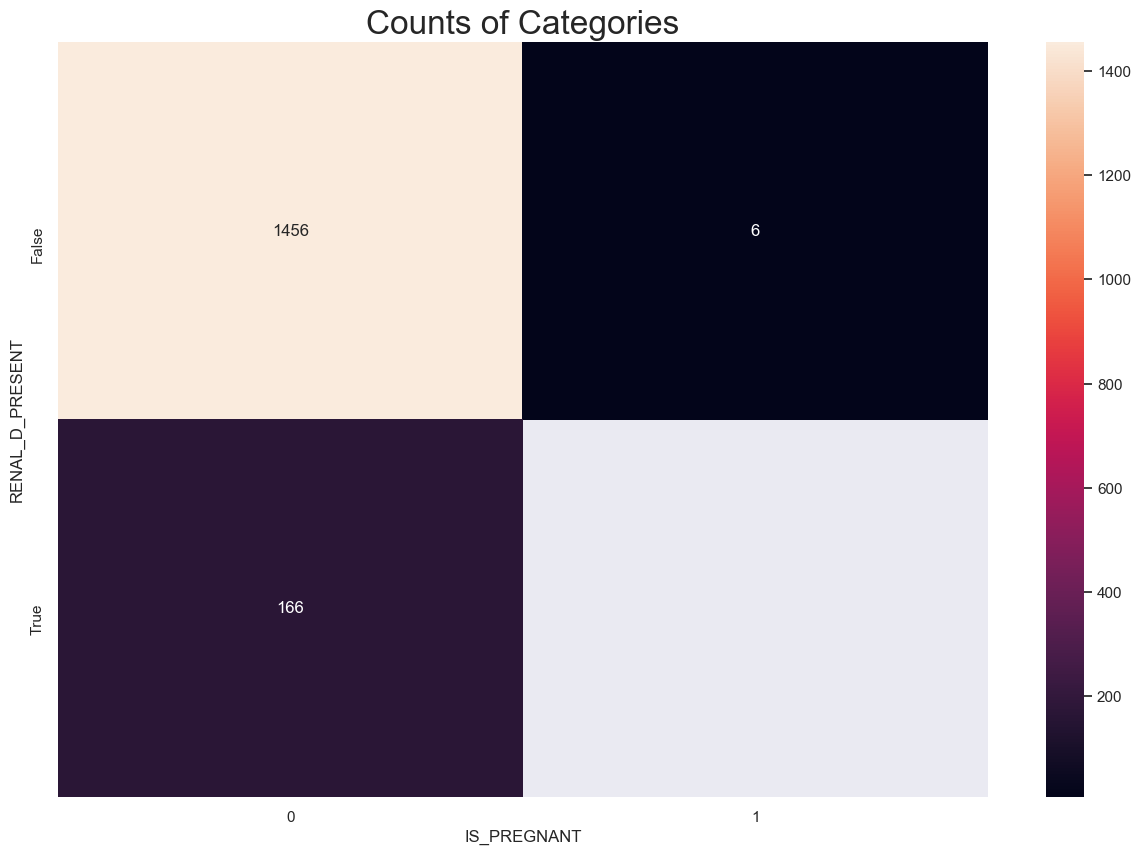

In [318]:
selCol = 'IS_PREGNANT'
selCols = ['RENAL_D_PRESENT',selCol]
getHeatmapCount(dfRes, selCol,fontScale=2)


(<matplotlib.axes._subplots.AxesSubplot at 0x1a61f051d48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a61f051d48>)

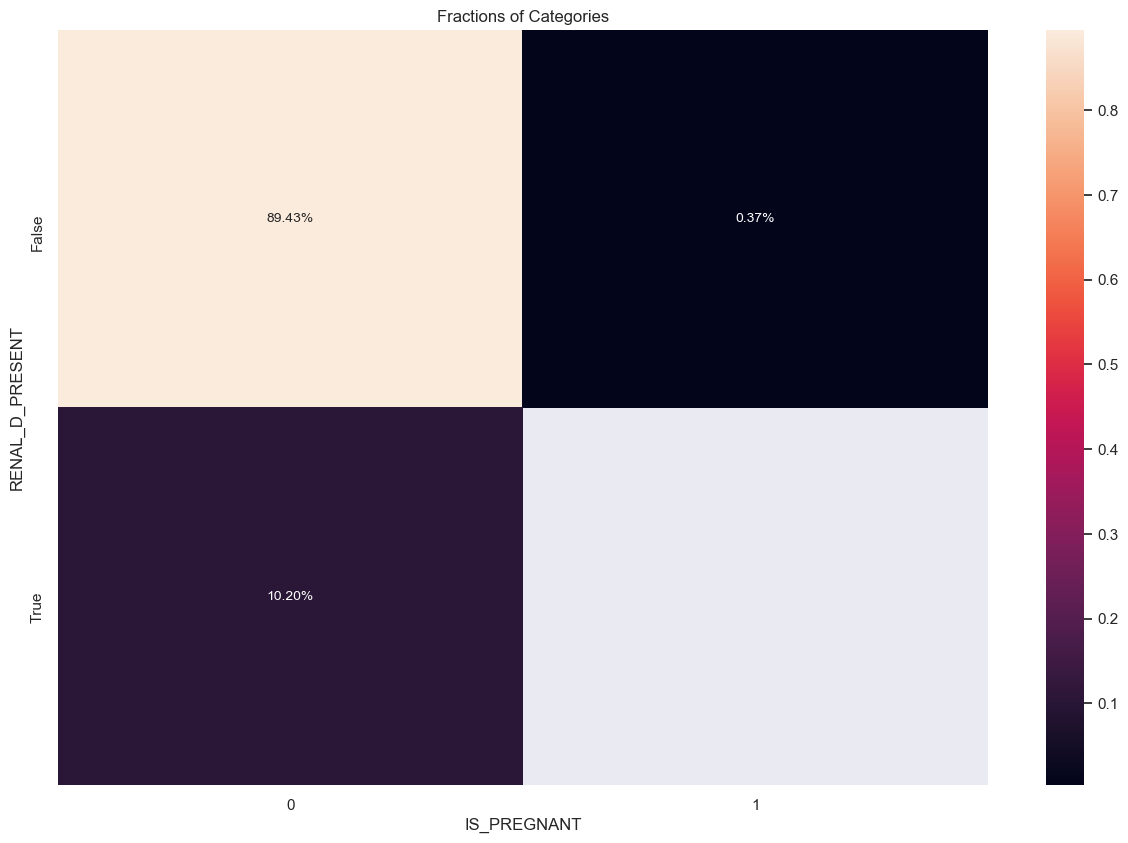

In [319]:
getHeatmapFreq(dfRes, selCol,fontScale=1)



<Figure size 1500x1000 with 0 Axes>

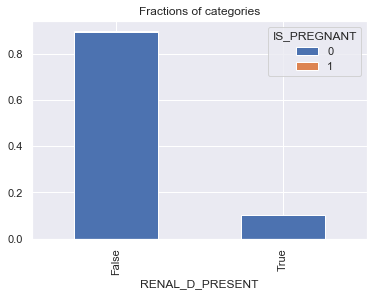

<Figure size 1500x1000 with 0 Axes>

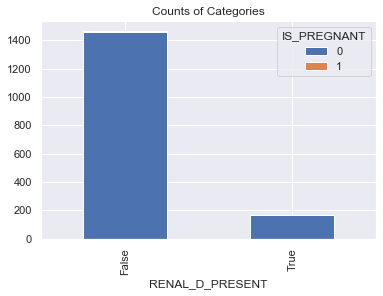

In [320]:
freqStackedBar(dfRes, selCol)
countsStackedBar(dfRes, selCols)



In [321]:
dfRes.columns


Index(['STUDY_ID', 'PATIENT_AGE', 'DOB', 'DATE_OF_DEATH', 'DOD_DATE', 'GENDER',
       'ETHNIC_GROUP', 'SMOKING_HISTORY', 'POSTCODE', 'IS_PREGNANT', 'HEIG',
       'WEIG', 'BMI', 'FIRST_POS_DATE', 'FIRST_POS_DATE_R', 'FIRST_POS_TIME_R',
       'ADMIT_DATETIME', 'ADM_DATE_R', 'ADM_TIME_R', 'DISCHARGEDATE',
       'DISCHARGE_DATE_R', 'DISCHARGE_TIME_R', 'LOS', 'LOS_PREPOS', 'READM28',
       'READM_DATETIME', 'READM_DATE', 'READM_TIME', 'COMORBIDITY', 'STATUS',
       'RENAL_D_PRESENT'],
      dtype='object')